# Variables Control Charts

The following notebook has been prepared for students in my Statistics 193.1 Introduction to Statistical Quality Control class. Data and examples are taken from Montgomery (2009).

Install required libraries (on first run only)

In [132]:
install.packages("qcc") # for control charts
install.packages("ggplotify")
install.packages("gridExtra")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Load libraries

In [25]:
library(qcc)
library(ggplotify)
library(gridExtra)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


## Xbar and R Charts

In [9]:
# data from Montgomery
hardbake.p1 <- rbind(
    c(1.3235, 1.4128, 1.6744, 1.4573, 1.6914),
    c(1.4314, 1.3592, 1.6075, 1.4666, 1.6109),
    c(1.4284, 1.4871, 1.4932, 1.4324, 1.5674),
    c(1.5028, 1.6352, 1.3841, 1.2831, 1.5507),
    c(1.5604, 1.2735, 1.5265, 1.4363, 1.6441),
    c(1.5955, 1.5451, 1.3574, 1.3281, 1.4198),
    c(1.6274, 1.5064, 1.8366, 1.4177, 1.5144),
    c(1.4190, 1.4303, 1.6637, 1.6067, 1.5519),
    c(1.3884, 1.7277, 1.5355, 1.5176, 1.3688),
    c(1.4039, 1.6697, 1.5089, 1.4627, 1.5220),
    c(1.4158, 1.7667, 1.4278, 1.5928, 1.4181),
    c(1.5821, 1.3355, 1.5777, 1.3908, 1.7559),
    c(1.2856, 1.4106, 1.4447, 1.6398, 1.1928),
    c(1.4951, 1.4036, 1.5893, 1.6458, 1.4969),
    c(1.3589, 1.2863, 1.5996, 1.2497, 1.5471),
    c(1.5747, 1.5301, 1.5171, 1.1839, 1.8662),
    c(1.3680, 1.7269, 1.3957, 1.5014, 1.4449),
    c(1.4163, 1.3864, 1.3057, 1.6210, 1.5573),
    c(1.5796, 1.4185, 1.6541, 1.5116, 1.7247),
    c(1.7106, 1.4412, 1.2361, 1.3820, 1.7601),
    c(1.4371, 1.5051, 1.3485, 1.5670, 1.4880),
    c(1.4738, 1.5936, 1.6583, 1.4973, 1.4720),
    c(1.5917, 1.4333, 1.5551, 1.5295, 1.6866),
    c(1.6399, 1.5243, 1.5705, 1.5563, 1.5530),
    c(1.5797, 1.3663, 1.6240, 1.3732, 1.6887)
)

colnames(hardbake.p1) <- c("samp_1","samp_2","samp_3","samp_4","samp_5")

head(hardbake.p1)

samp_1,samp_2,samp_3,samp_4,samp_5
1.3235,1.4128,1.6744,1.4573,1.6914
1.4314,1.3592,1.6075,1.4666,1.6109
1.4284,1.4871,1.4932,1.4324,1.5674
1.5028,1.6352,1.3841,1.2831,1.5507
1.5604,1.2735,1.5265,1.4363,1.6441
1.5955,1.5451,1.3574,1.3281,1.4198


In [14]:
# sample averages:
samp_means <- apply(hardbake.p1, 1, mean)
samp_means

[1] 1.51188 1.49512 1.48170 1.47118 1.48816 1.44918 1.58050 1.53432 1.50760
[10] 1.51344 1.52424 1.52840 1.39470 1.52614 1.40832 1.53440 1.48738 1.45734
[19] 1.57770 1.50600 1.46914 1.53900 1.55924 1.56880 1.52638

In [16]:
# sample ranges:
samp_range <- apply(hardbake.p1, 1, function(x) max(x) - min(x))
samp_range

[1] 0.3679 0.2517 0.1390 0.3521 0.3706 0.2674 0.4189 0.2447 0.3589 0.2658
[11] 0.3509 0.4204 0.4470 0.2422 0.3499 0.6823 0.3589 0.3153 0.3062 0.5240
[21] 0.2185 0.1863 0.2533 0.1156 0.3224

In [17]:
# overall mean and range
c(mean(samp_means), mean(samp_range))

[1] 1.505610 0.325208

In [19]:
# tabulated values
A2 <- 0.577
D3 <- 0
D4 <- 2.114

# our control limits for the xbar chart
lcl.x <- mean(samp_means) - A2 * mean(samp_range)
ucl.x <- mean(samp_means) + A2 * mean(samp_range)

c(lcl.x, ucl.x)

[1] 1.317965 1.693255

In [20]:
# our control limits for the R chart
ucl.r <- D4 * mean(samp_range)
lcl.r <- D3 * mean(samp_range)

c(lcl.r, ucl.r)

[1] 0.0000000 0.6874897

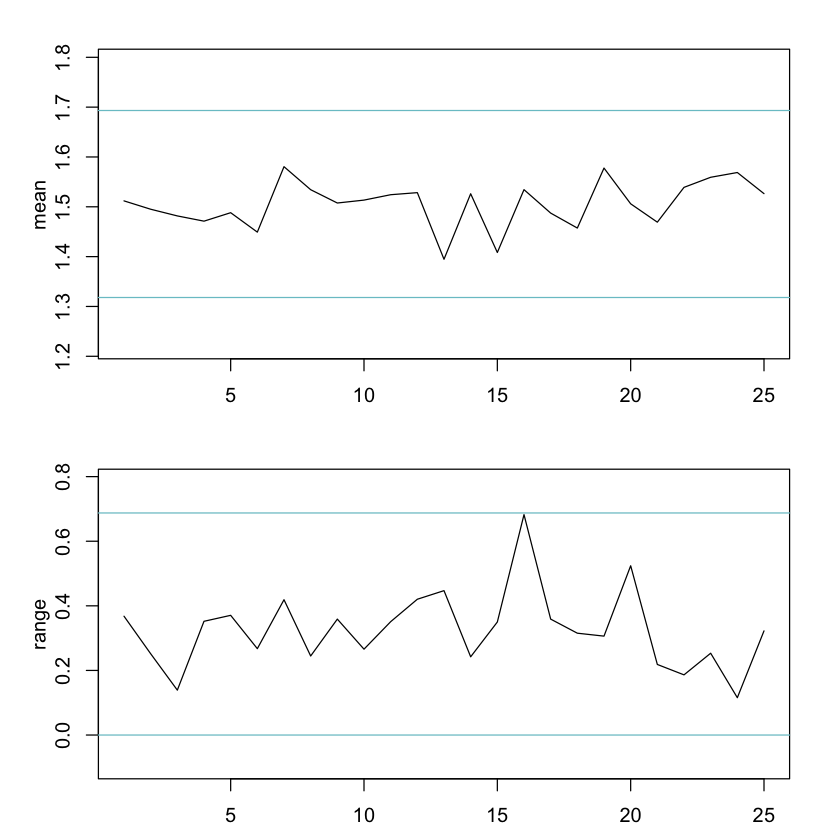

In [71]:
# plot the R chart
grid.arrange(
    as.grob(function(){
        plot(samp_means, type = "l", ylim = c(lcl.x - 0.1, ucl.x + 0.1),
        xlab = "", ylab = "mean")
        abline(h = ucl.x, col = "cadetblue3")
        abline(h = lcl.x, col = "cadetblue3")
    }),
    as.grob(function(){
        plot(samp_range, type = "l", ylim = c(lcl.r - 0.1, ucl.r + 0.1),
        xlab = "", ylab = "range")
        abline(h = ucl.r, col = "cadetblue3")
        abline(h = lcl.r, col = "cadetblue3")
    }),
    nrow = 2
)

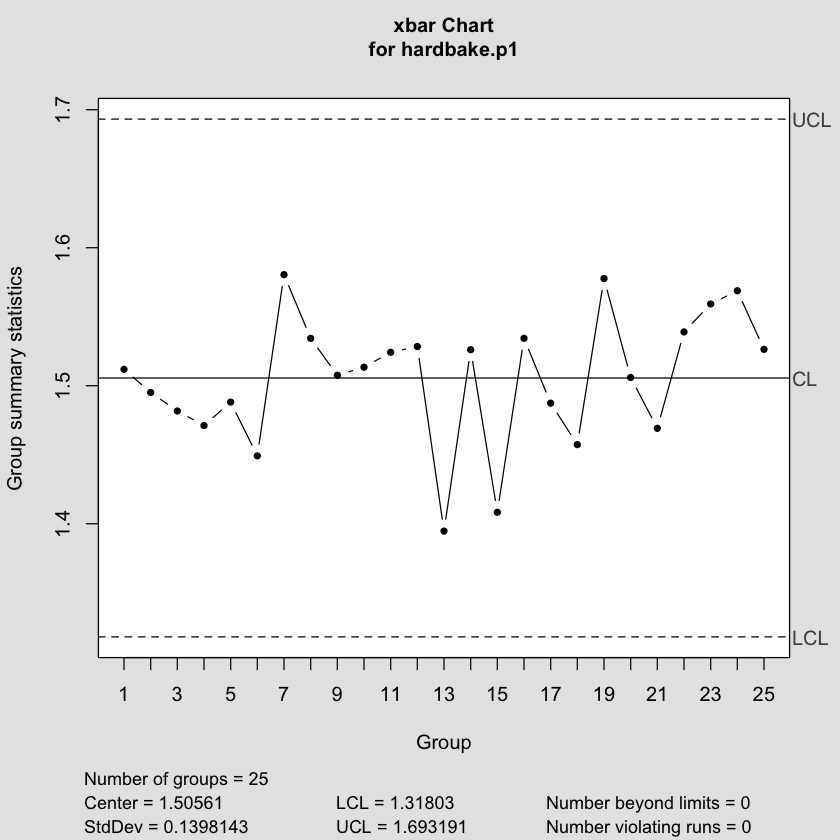

In [41]:
qchart.x <- qcc(hardbake.p1, type="xbar")
plot(qchart.x)

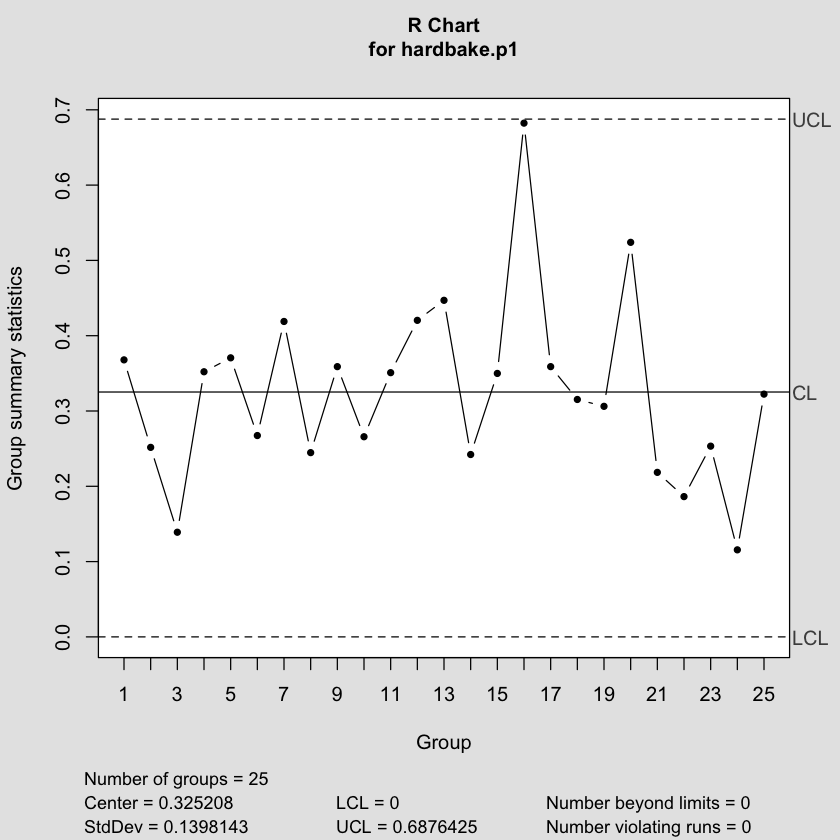

In [44]:
qchart.r <- qcc(hardbake.p1, type="R")
plot(qchart.r)

In [119]:
# for the phase 2
hardbake.p2 <- rbind(
    c(1.4483, 1.5458, 1.4538, 1.4303, 1.6206),
    c(1.5435, 1.6899, 1.5830, 1.3358, 1.4187),
    c(1.5175, 1.3446, 1.4723, 1.6657, 1.6661),
    c(1.5454, 1.0931, 1.4072, 1.5039, 1.5264),
    c(1.4418, 1.5059, 1.5124, 1.4620, 1.6263),
    c(1.4301, 1.2725, 1.5945, 1.5397, 1.5252),
    c(1.4981, 1.4506, 1.6174, 1.5837, 1.4962),
    c(1.3009, 1.5060, 1.6231, 1.5831, 1.6454),
    c(1.4132, 1.4603, 1.5808, 1.7111, 1.7313),
    c(1.3817, 1.3135, 1.4953, 1.4894, 1.4596),
    c(1.5765, 1.7014, 1.4026, 1.2773, 1.4541),
    c(1.4936, 1.4373, 1.5139, 1.4808, 1.5293),
    c(1.5729, 1.6738, 1.5048, 1.5651, 1.7473),
    c(1.8089, 1.5513, 1.8250, 1.4389, 1.6558),
    c(1.6236, 1.5393, 1.6738, 1.8698, 1.5036),
    c(1.4120, 1.7931, 1.7345, 1.6391, 1.7791),
    c(1.7372, 1.5663, 1.4910, 1.7809, 1.5504),
    c(1.5971, 1.7394, 1.6832, 1.6677, 1.7974),
    c(1.4295, 1.6536, 1.9134, 1.7272, 1.4370),
    c(1.6217, 1.8220, 1.7915, 1.6744, 1.9404)
)

colnames(hardbake.p2) <- c("samp_1","samp_2","samp_3","samp_4","samp_5")

head(hardbake.p2)

samp_1,samp_2,samp_3,samp_4,samp_5
1.4483,1.5458,1.4538,1.4303,1.6206
1.5435,1.6899,1.5830,1.3358,1.4187
1.5175,1.3446,1.4723,1.6657,1.6661
1.5454,1.0931,1.4072,1.5039,1.5264
1.4418,1.5059,1.5124,1.4620,1.6263
1.4301,1.2725,1.5945,1.5397,1.5252


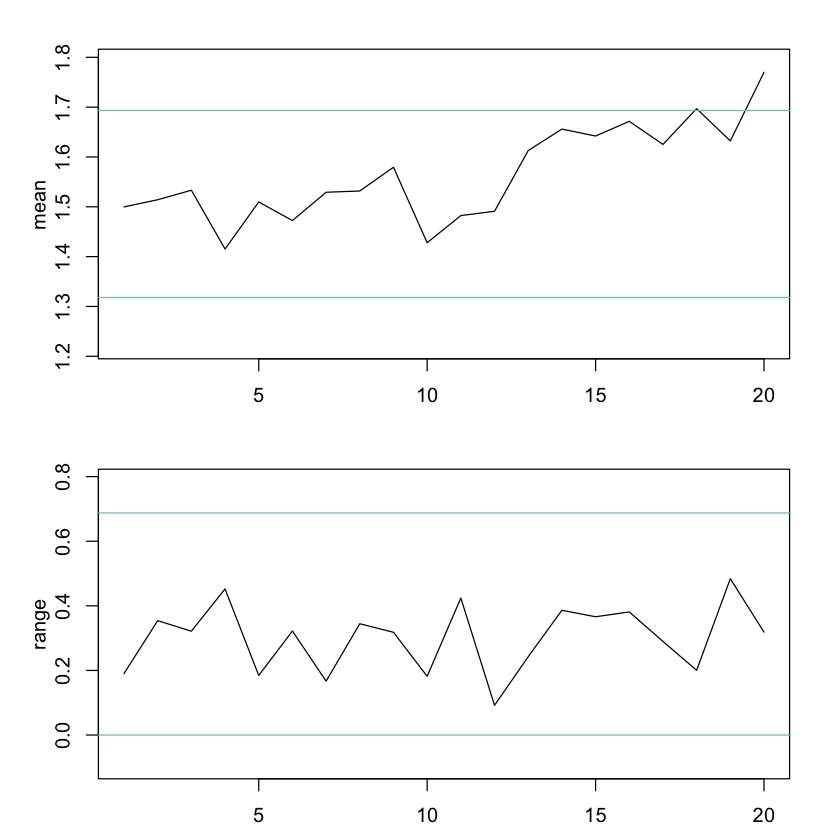

In [120]:
samp_means2 <- apply(hardbake.p2, 1, mean)
samp_range2 <- apply(hardbake.p2, 1, function(x) max(x) - min(x))

# plot the R chart
grid.arrange(
    as.grob(function(){
        plot(samp_means2, type = "l", ylim = c(lcl.x - 0.1, ucl.x + 0.1),
        xlab = "", ylab = "mean")
        abline(h = ucl.x, col = "cadetblue3")
        abline(h = lcl.x, col = "cadetblue3")
    }),
    as.grob(function(){
        plot(samp_range2, type = "l", ylim = c(lcl.r - 0.1, ucl.r + 0.1),
        xlab = "", ylab = "range")
        abline(h = ucl.r, col = "cadetblue3")
        abline(h = lcl.r, col = "cadetblue3")
    }),
    nrow = 2
)

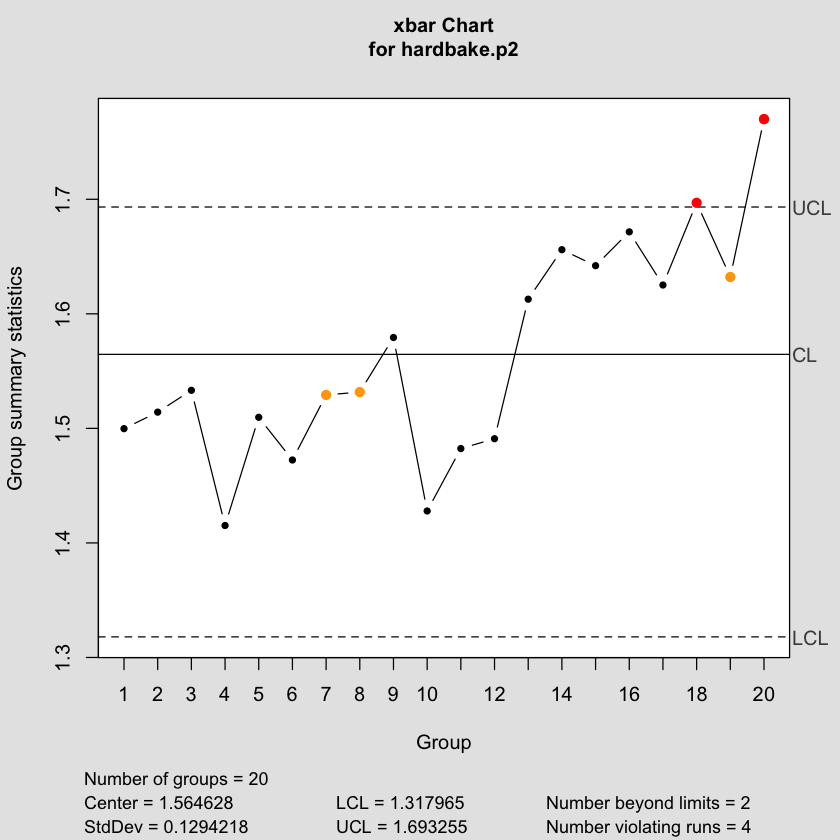

In [125]:
qchart2.x <- qcc(hardbake.p2, type="xbar", limits = c(lcl.x, ucl.x))

plot(qchart2.x)

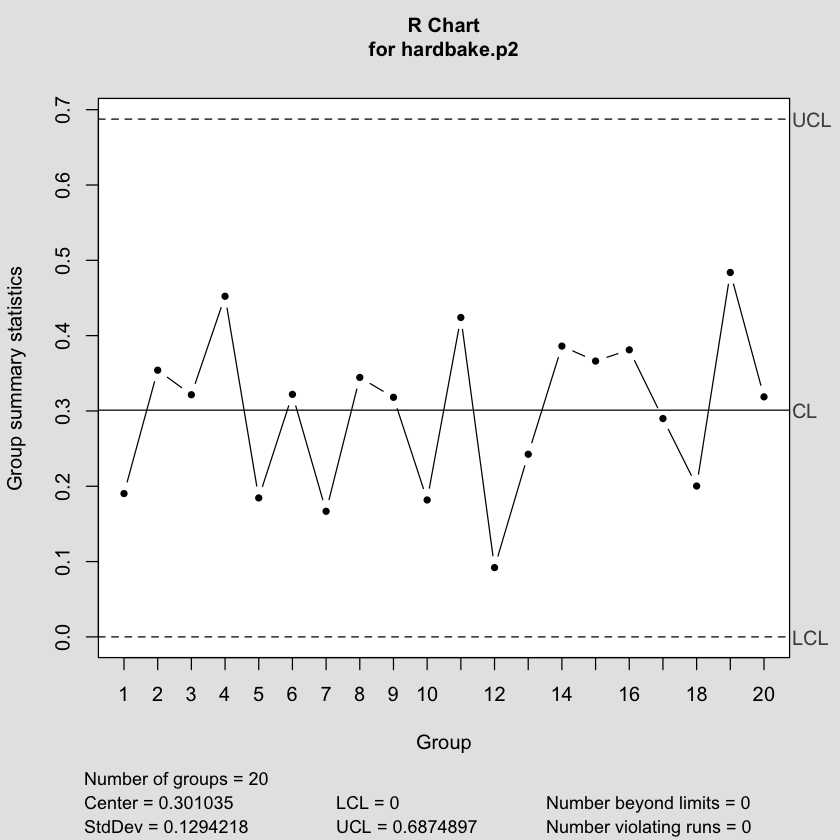

In [126]:
qchart2.r <- qcc(hardbake.p2, type="R", limits = c(lcl.r, ucl.r))

plot(qchart2.r)

In [127]:
hardbake.p2 <- data.frame(hardbake.p2)
hardbake.p2$samp_num <- 1:nrow(hardbake.p2)

head(hardbake.p2)

samp_1,samp_2,samp_3,samp_4,samp_5,samp_num
1.4483,1.5458,1.4538,1.4303,1.6206,1
1.5435,1.6899,1.5830,1.3358,1.4187,2
1.5175,1.3446,1.4723,1.6657,1.6661,3
1.5454,1.0931,1.4072,1.5039,1.5264,4
1.4418,1.5059,1.5124,1.4620,1.6263,5
1.4301,1.2725,1.5945,1.5397,1.5252,6


In [128]:
hardbake.wide <- reshape(hardbake.p2, varying = c("samp_1","samp_2","samp_3","samp_4","samp_5"),
        v.names = "output", direction = "long")
        
head(hardbake.wide)

,samp_num,time,output,id
1.1,1,1,1.4483,1
2.1,2,1,1.5435,2
3.1,3,1,1.5175,3
4.1,4,1,1.5454,4
5.1,5,1,1.4418,5
6.1,6,1,1.4301,6


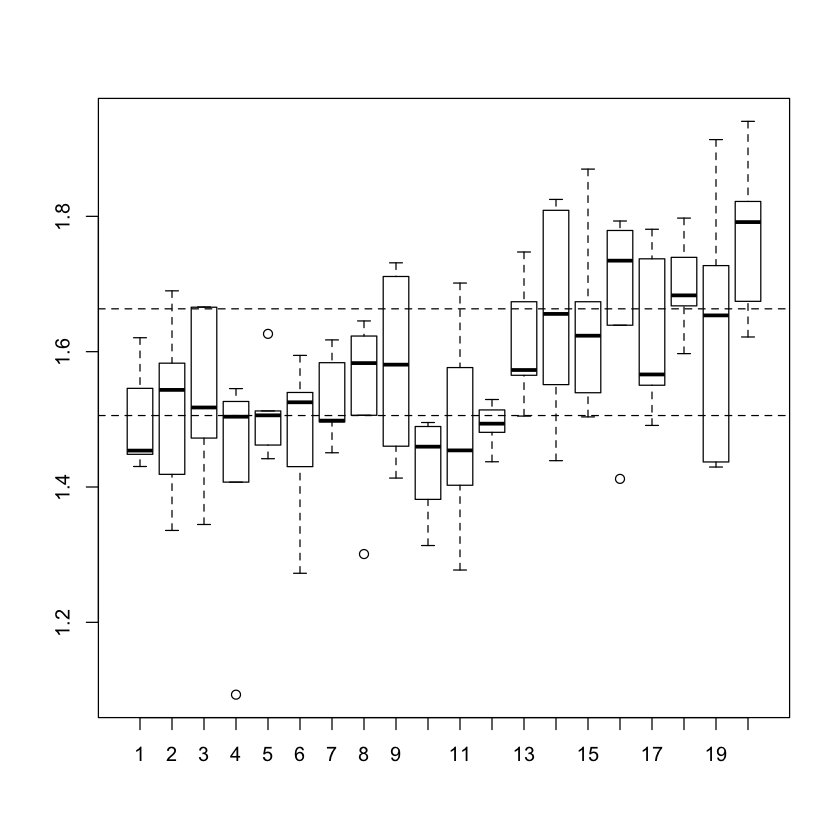

In [129]:
plot(output ~ factor(samp_num), data = hardbake.wide,
xlab = "", ylab = "")
abline(h = 1.5056, lty = 2)
abline(h = 1.6633, lty = 2)

### OC Curves for the Xbar and R Charts

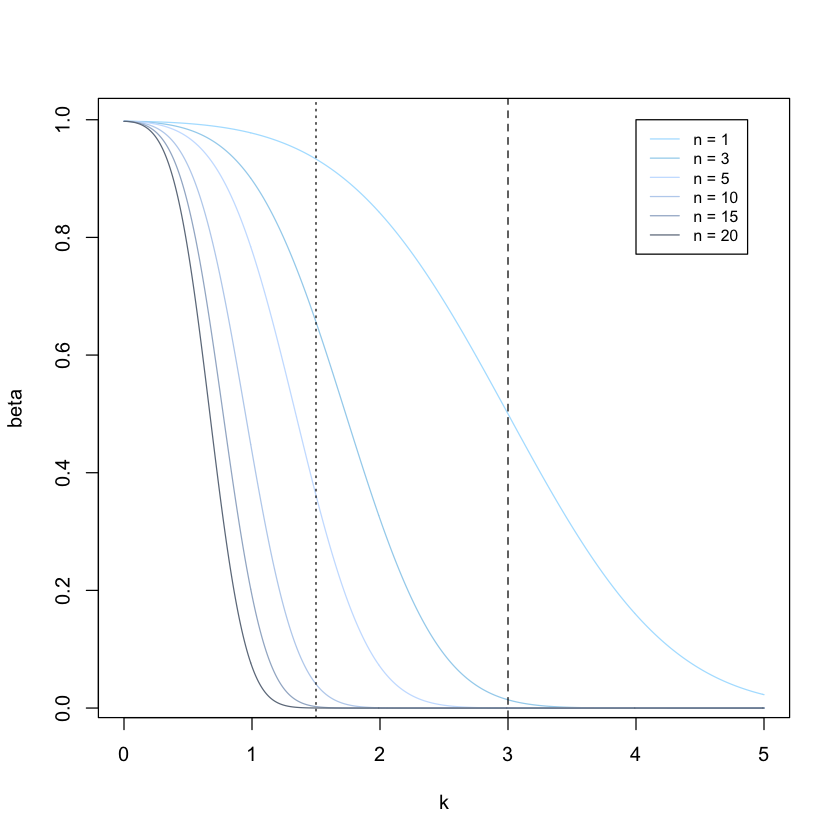

In [137]:
# define the beta function, x = k here
beta <- function(x, n, L = 3){
    pnorm(L - x * sqrt(n)) - pnorm(-L-x*sqrt(n))
}

# for n = 1, 3, 5, 10, 15, 20
k = seq(0, 5, by = 0.01)
plot(k, beta(k, 1, 3), type = "l", col = "lightskyblue1", ylab = "beta")
lines(k,beta(k, 3, 3), col = "lightskyblue2")
lines(k,beta(k, 5, 3), col = "lightsteelblue1")
lines(k,beta(k, 10, 3), col = "lightsteelblue2")
lines(k,beta(k, 15, 3), col = "lightsteelblue3")
lines(k,beta(k, 20, 3), col = "lightsteelblue4")
abline(v = 3.0, lty = 2)
abline(v = 1.5, lty = 3)
legend(4, 1, legend=c("n = 1", "n = 3","n = 5","n = 10","n = 15", "n = 20"),
       col=c("lightskyblue1", "lightskyblue2","lightsteelblue1","lightsteelblue2","lightsteelblue3","lightsteelblue4"), 
       lty = 1, cex=0.8)

In [138]:
# probability of not detecting a 1.5 sigma shift in mean
c(
    beta(1.5, 1, 3), # for n = 1
    beta(1.5, 3, 3), # for n = 3
    beta(1.5, 5, 3), # for n = 5
    beta(1.5, 10, 3), # for n = 10
    beta(1.5, 15, 3), # for n = 15
    beta(1.5, 20, 3)  # for n = 20
)

[1] 0.9331894011 0.6561299317 0.3616312342 0.0406304449 0.0024811185
[6] 0.0001043673

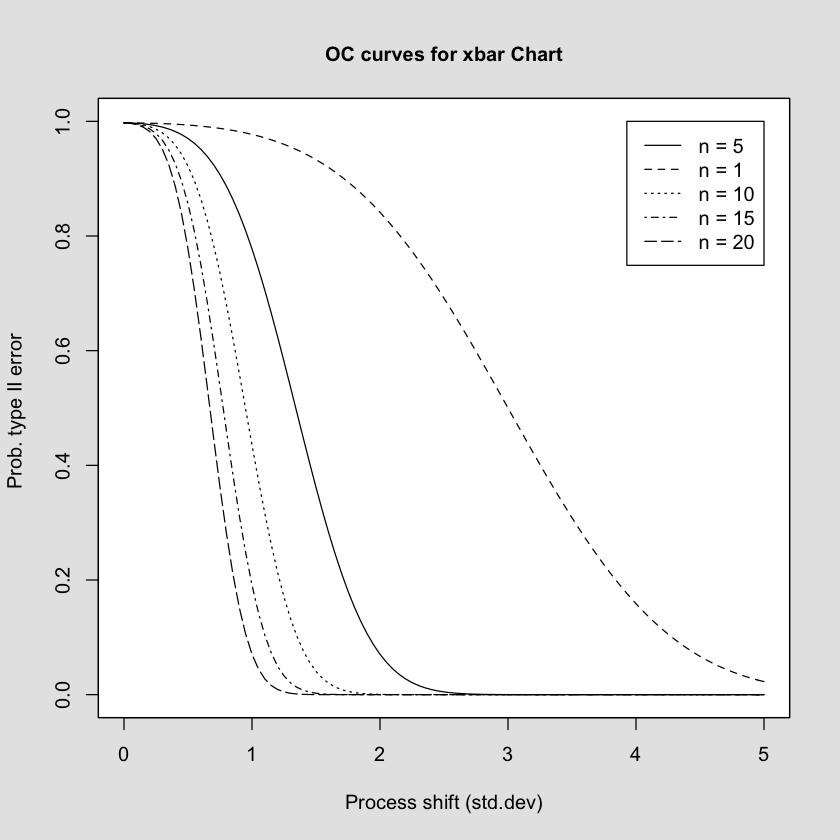

In [116]:
# using the qcc function
oc.curves(qchart.x)

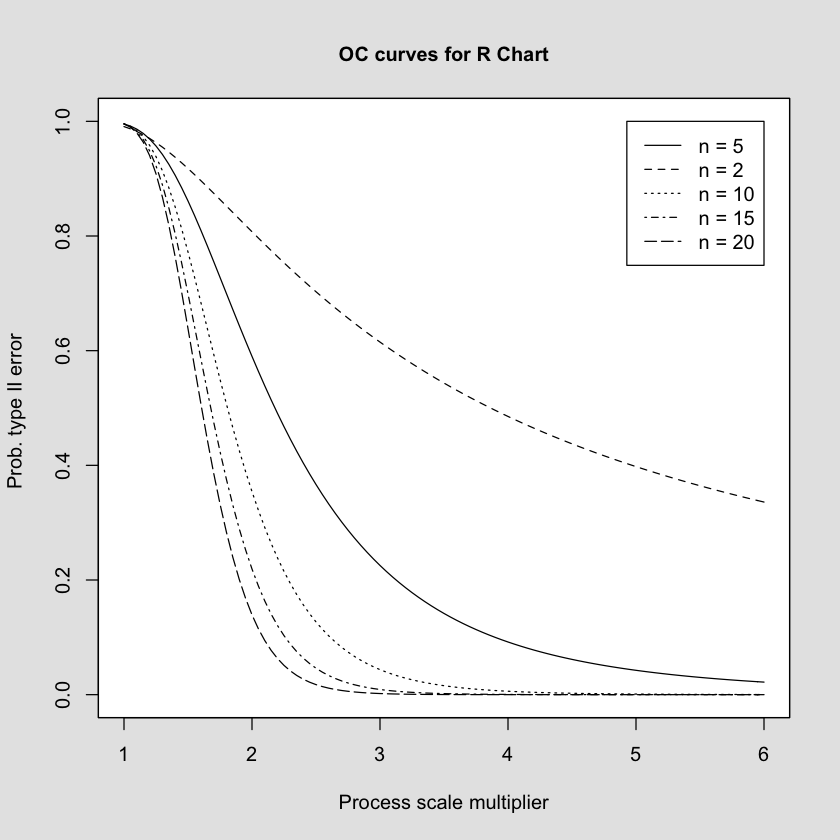

In [131]:
oc.curves(qchart.r)

## References

1. Douglas Montgomery. *Introduction to Statistical Quality Control, A Modern Introduction*. Hoboken, N.J. Wiley, 2009.
2. Luca Scrucca. qcc: an r package for quality control charting and statistical process control. *R News*, 4/1:11–17, 2004.